# ***Procesos AR(1) estacionarios***

Considere un proceso AR(1):

$$
\tilde{X}_t - \phi \tilde{X}_{t-1} = Z_t \quad ; \quad \{Z_t\} \sim \text{WN}(0, \sigma_Z^2)
$$

donde:

$$
\tilde{X}_t = X_t - \mu
$$
---

Note que...
*Proposición*

Sea $\{Y_t\}$ una serie de tiempo estacionaria con media 0 y función de covarianza $\gamma_Y$. Si:

$$
\sum_{j=-\infty}^{\infty} |\psi_j| < \infty,
$$

entonces la serie de tiempo:

$$
X_t = \sum_{j=-\infty}^{\infty} \psi_j Y_{t-j} = \psi(B)Y_t \tag{2.2.3}
$$

es estacionaria con media 0 y función de autocovarianza:

$$
\gamma_X(h) = \sum_{j=-\infty}^{\infty} \sum_{k=-\infty}^{\infty} \psi_j \psi_k \, \gamma_Y(h + k - j) \tag{2.2.4}
$$

En el caso especial donde $\{X_t\}$ es un proceso lineal:

$$
\gamma_X(h) = \sum_{j=-\infty}^{\infty} \psi_j \psi_{j+h} \, \sigma^2 \tag{2.2.5}
$$
---

Suponga que un proceso AR(1) satisface que $|\phi| < 1$ y que $\tilde{X}_t$ no está correlacionado con $\tilde{X}_s$ para cada $s < t$.

Entonces, **probamos que este proceso es estacionario.**


Sin pérdida de generalidad, suponga que $\mu = 0$, entonces:

$$
X_t = \phi X_{t-1} + Z_t
$$

$$
X_t = \phi(\phi X_{t-2} + Z_{t-1}) + Z_t 
$$

$$
X_t = \phi^2 X_{t-2} + \phi Z_{t-1} + Z_t
$$

$$
X_t = \phi^2(\phi X_{t-3} + Z_{t-2}) + \phi Z_{t-1} + Z_t 
$$

$$
X_t = \phi^3 X_{t-3} + \phi^2 Z_{t-2} + \phi Z_{t-1} + Z_t
$$

...

En general:

$$
X_t = \phi^k X_{t-k} + \sum_{j=0}^{k-1} \phi^j Z_{t-j}
$$

Como $|\phi| < 1$, al tomar $k \to \infty$, entonces:

$$
X_t = \sum_{j=0}^{\infty} \phi^j Z_{t-j}
$$

Es decir, $X_t$ se puede expresar como un proceso lineal en términos de los errores pasados, lo que implica:

$$
X_t = \phi(B)Z_t
$$
.


Por la *Proposición* podemos concluir que el proceso
$$
X_t=\phi X_{t-1}+Z_t,\qquad |\phi|<1,\ \ \{Z_t\}\sim \text{WN}(0,\sigma_Z^2)
$$
es **estacionario**, con media cero y **función de autocovarianza** dada por

$$
\gamma_X(h) = \sum_{j=-\infty}^{\infty} \sum_{k=-\infty}^{\infty} \psi_j \psi_k \, \gamma_Y(h + k - j)
$$

**Y en el caso especial donde $\{X_t\}$ es un proceso lineal**:

$$
\gamma_X(h) = \sum_{j=-\infty}^{\infty} \psi_j \psi_{j+h} \, \sigma^2
$$


$$
\gamma_X(h) = \sum_{j=-\infty}^{\infty} \psi_j \psi_{j+h} \sigma_Z^2 = \sum_{j=0}^{\infty} \phi^j \phi^{j+h} \sigma_Z^2 = \sum_{j=0}^{\infty} \phi^{2j} \phi^h \sigma_Z^2
$$


Como $|\phi| < 1$ entonces

$$
\sum_{j=0}^{\infty} \phi^{2j} \phi^h \sigma_Z^2 \quad \text{converge a} \quad \frac{\phi^h \sigma_Z^2}{1 - \phi^2}
$$

Por lo tanto

$$
\gamma_X(h) = \frac{\phi^{|h|} \sigma_Z^2}{1 - \phi^2} \quad ; \quad h \geq 0
$$

Calculemos la función de autocorrelación del proceso AR(1)

$$
\rho_X(h) = \frac{\gamma_X(h)}{\gamma_X(0)}
$$


$$
\gamma_X(0) = \text{Var}(X_t) = \text{Var}(\phi X_{t-1} + Z_t) = \phi^2 \text{Var}(X_{t-1}) + \text{Var}(Z_t)
$$

$$
= \phi^2 \text{Var}(X_{t-1}) + \sigma_Z^2
$$

$$
\text{Var}(X_t) - \phi^2 \text{Var}(X_{t-1}) = \sigma_Z^2
$$

$$
(1 - \phi^2) \, \text{Var}(X_t) = \sigma_Z^2
$$

$$
\text{Var}(X_t) = \frac{\sigma_Z^2}{1 - \phi^2}
$$


De esta forma, se tiene

$$
\rho_X(h) = \frac{\phi^{|h|} \, \sigma_Z^2}{1 - \phi^2} - \frac{\sigma_Z^2}{1 - \phi^2} = \phi^{|h|} \quad ; \quad h \geq 0
$$


## Ejemplo, considere el proceso

$$
(1 - 0.4B) X_t = Z_t \quad ; \quad \{Z_t\} \sim \text{WN}(0, \sigma_Z^2)
$$

$$
\phi = 0.4
$$

$$
\rho_1 = \phi \\
\rho_2 = \phi^2 \\
\rho_3 = \phi^3 \\
\vdots
$$



---


### Gráfico de la FAC teórica del proceso $(1 - 0.4B) X_t = Z_t$


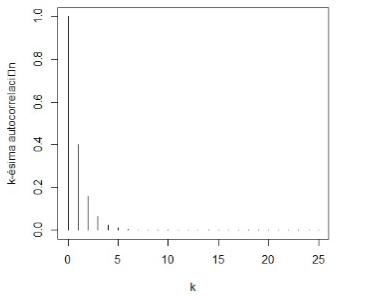